In [1018]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

<span style="font-size: larger;">Task 1. Defining the type of wine</span>

In [1019]:
wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winemerged_data.csv")
wine.drop(['outliers','quality_category'], axis = 1, inplace=True)
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1020]:
skewness= wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Wine', skewness.sort_values())

'Wine'

total sulfur dioxide   -0.001177
pH                      0.386839
citric acid             0.471731
density                 0.503602
alcohol                 0.565718
free sulfur dioxide     1.220066
residual sugar          1.435404
volatile acidity        1.495097
fixed acidity           1.723290
sulphates               1.797270
chlorides               5.399828
dtype: float64

In [1021]:
kurtosis = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display('Wine', kurtosis.sort_values())

'Wine'

alcohol                 -0.531687
total sulfur dioxide    -0.371664
pH                       0.367657
citric acid              2.397239
volatile acidity         2.825372
residual sugar           4.359272
fixed acidity            5.061161
density                  6.606067
free sulfur dioxide      7.906238
sulphates                8.653699
chlorides               50.898051
dtype: float64

In [1022]:
# One-Hot Encoder "white" will have 0 in the "red" and a 1 in the "white"
OHE = OneHotEncoder()
wine_OHE = OHE.fit_transform(wine[['wine_type']])
wine_OHE_df = pd.DataFrame(wine_OHE.toarray(), columns=OHE.get_feature_names_out(['wine_type']))
wine = pd.concat([wine, wine_OHE_df], axis=1)
wine.head()

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
0,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,red wine,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,red wine,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,red wine,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,0.0
4,red wine,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0


In [1023]:
wine = wine.drop('wine_type', axis=1)
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_red wine,wine_type_white wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0,1.0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0.0,1.0


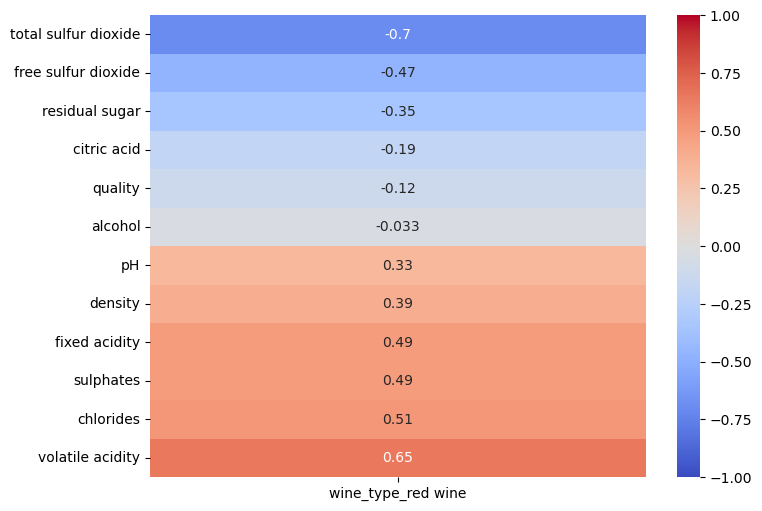

In [1024]:
plt.figure(figsize=(8, 6))
correlation_with_red_wine = wine.corr()['wine_type_red wine'].drop(['wine_type_red wine','wine_type_white wine']).sort_values(ascending=True)
sns.heatmap(correlation_with_red_wine.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [1025]:
type = wine["wine_type_red wine"].values.reshape(-1, 1)
wine = wine[['volatile acidity','chlorides', 'total sulfur dioxide', 'sulphates']] #testing only with 4 parameters

print(type.shape)
print(wine.shape)

(6497, 1)
(6497, 4)


In [1026]:
x_train, x_test, y_train, y_test = train_test_split(wine, type, test_size=0.2, random_state=42)

In [1027]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(x_test, y_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(x_test, y_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(x_test, y_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(x_test, y_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(x_test, y_test))*100)

In [1028]:
models(x_train,y_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 96.23076923076923
Linear Regression Training Accuracy: 72.89927698196146
K Nearest Neighbor Training Accuracy: 0.9407692307692308
Decision Tree Classifier Training Accuracy: 98.53846153846155
Random Forest Classifier Training Accuracy: 98.53846153846155


In [1032]:
# Chosed Logistic Regression Algorithm because it's simple fast and works good for binary classification
wine_logregression = LogisticRegression(C= 10, max_iter= 300, penalty= 'l1', solver= 'liblinear', random_state = 0)
wine_logregression.fit(x_train, y_train.ravel())
print(f'Logistic Regression Algorithm Accuracy: {(wine_logregression.score(x_train, y_train)*100).round(2)}')

Logistic Regression Algorithm Accuracy: 97.69


In [1033]:
#manually prediction
predictions_w = [0.21, 0.039, 90.0, 0.68] # Enter the attributes ['volatile acidity','chlorides', 'total sulfur dioxide', 'sulphates']
pred_result = wine_logregression.predict([predictions_w])
wine_mapping = {1:"Red Wine", 0: "White wine"}
predicted_wine = wine_mapping.get(pred_result[0], "Unknown Wine")
print(f"We probably have: {predicted_wine}")

We probably have: White wine


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<details>
<summary>before GridSearchCV</summary>
Logistic Regression Algorithm Accuracy: 97.04
another Grid (solver='lbfgs', max_iter=100, C=10, penalty='l2')  =  97.46
another (C= 5, max_iter= 350, penalty= 'l1', solver= 'liblinear', random_state = 0) = 97.67
</details>

In [1030]:
#GridSearchCV no need to run again. uncomment if necessary
wine_logregression = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10], 
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100, 200, 250, 300, 350, 400,450,500],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
#grid_search = GridSearchCV(estimator=wine_logregression, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search.fit(x_train, y_train.ravel())
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_estimator = grid_search.best_estimator_
best_model_accuracy = best_estimator.score(x_train, y_train)
print("Best Training Accuracy:", best_model_accuracy)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- alcohol
- citric acid


Defining the function for model evaluating (Confusion Matrix, Classification report and Cohen_Kappa_score)

In [ ]:
def evaluate_model(model, X_test, y_true, target_names=None):
    y_pred = model.predict(X_test)

    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confusion)

    report = classification_report(y_true, y_pred, target_names=target_names)
    print("Classification Report:")
    print(report)

    kappa = cohen_kappa_score(y_pred, y_true)
    print("Cohen-Kappa score:", kappa)

In [1034]:
evaluate_model(wine_logregression, x_test, y_test, target_names=["White", "Red"])

Confusion Matrix:
[[949  10]
 [ 29 312]]
Classification Report:
              precision    recall  f1-score   support

       White       0.97      0.99      0.98       959
         Red       0.97      0.91      0.94       341

    accuracy                           0.97      1300
   macro avg       0.97      0.95      0.96      1300
weighted avg       0.97      0.97      0.97      1300

Cohen-Kappa score: 0.9210644313525228


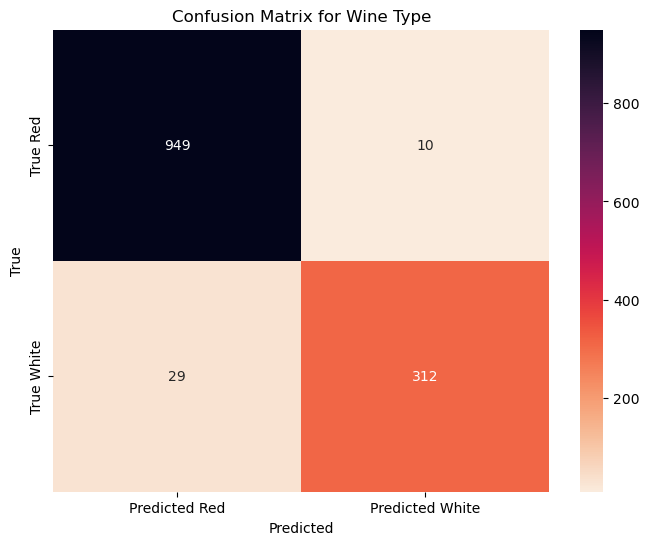

In [1036]:
#heatmap to present results
cm = confusion_matrix(y_test, wine_logregression.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["Predicted Red", "Predicted White"], yticklabels=["True Red", "True White"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Wine Type")
plt.show()

Trying KNeighbour and Decision Tree to compare the results

In [ ]:
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
print(f'KNeighborsClassifier Accuracy: {(knn.score(x_train, y_train)*100).round(2)}')
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(x_train, y_train.ravel())
print(f'DecisionTreeClassifier Accuracy: {(tree.score(x_train, y_train)*100).round(2)}')


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier Accuracy: 96.73
DecisionTreeClassifier Accuracy: 99.96


In [ ]:
evaluate_model(knn, x_test, y_test, target_names=["White", "Red"])

Confusion Matrix:
[[934  25]
 [ 52 289]]
Classification Report:
              precision    recall  f1-score   support

       White       0.95      0.97      0.96       959
         Red       0.92      0.85      0.88       341

    accuracy                           0.94      1300
   macro avg       0.93      0.91      0.92      1300
weighted avg       0.94      0.94      0.94      1300

Cohen-Kappa score: 0.8429439305124955


Confusion Matrix:
[[951   8]
 [ 11 330]]
Classification Report:
              precision    recall  f1-score   support

       White       0.99      0.99      0.99       959
         Red       0.98      0.97      0.97       341

    accuracy                           0.99      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300

Cohen-Kappa score: 0.9621272524318291


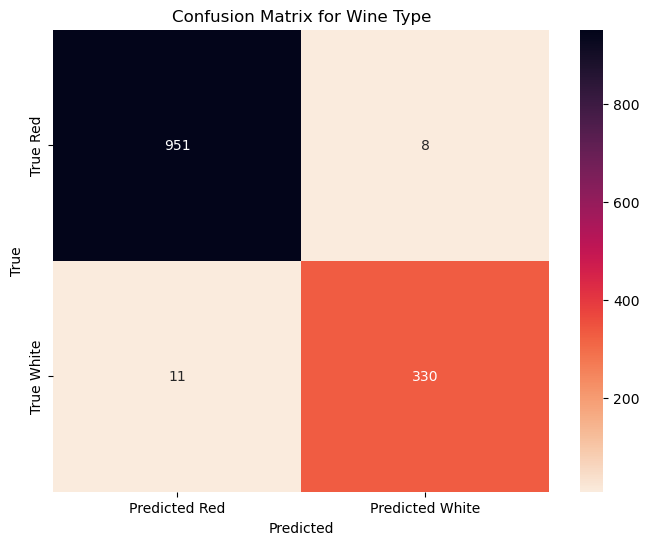

In [ ]:
evaluate_model(tree, x_test, y_test, target_names=["White", "Red"])
cm = confusion_matrix(y_test, tree.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["Predicted Red", "Predicted White"], yticklabels=["True Red", "True White"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Wine Type")
plt.show()

<span style="font-size: larger;">Task 2. Implementing ML for defining RED WINE QUALITY</span>

In [1037]:
red_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-red.csv", sep=';')
red_wine['quality_category'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')#in original DF was no categories
label_encoder = LabelEncoder()
red_wine['quality_encoded'] = label_encoder.fit_transform(red_wine['quality_category'])
red_wine['quality_category'].value_counts()

quality_category
medium    837
low       744
high       18
Name: count, dtype: int64

In [ ]:
skewness_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('Red wine', skewness_rw.sort_values())

'Red wine'

density                 0.071288
pH                      0.193683
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [ ]:
kurtosis_rw = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_rw.sort_values())

citric acid             -0.788998
alcohol                  0.200029
pH                       0.806943
density                  0.934079
fixed acidity            1.132143
volatile acidity         1.225542
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
sulphates               11.720251
residual sugar          28.617595
chlorides               41.715787
dtype: float64

In [1038]:
red_wine = red_wine.drop(['density','fixed acidity', 'quality_category','residual sugar','free sulfur dioxide','pH'],axis='columns')
Quality = red_wine["quality_encoded"] 
Quality = Quality.values.reshape(-1, 1)

print(red_wine.shape)
print(Quality.shape)

(1599, 8)
(1599, 1)


In [1039]:
red_wine = red_wine.drop(["quality_encoded", 'quality'],axis='columns') 

In [1041]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   chlorides             1599 non-null   float64
 3   total sulfur dioxide  1599 non-null   float64
 4   sulphates             1599 non-null   float64
 5   alcohol               1599 non-null   float64
dtypes: float64(6)
memory usage: 75.1 KB


In [1042]:
r_train, r_test, Q_train, Q_test = train_test_split(red_wine, Quality, test_size=0.2, random_state=42)

In [1045]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(r_test, Q_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(r_test, Q_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(r_test, Q_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(r_test, Q_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(r_test, Q_test))*100)

In [1046]:
models(r_train, Q_train)

Logistic Regression Training Accuracy: 72.1875
Linear Regression Training Accuracy: 14.797455778511349
K Nearest Neighbor Training Accuracy: 0.653125
Decision Tree Classifier Training Accuracy: 73.75
Random Forest Classifier Training Accuracy: 77.1875


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
red_rf = RandomForestClassifier(max_depth =20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state = 0)
red_rf.fit(r_train, Q_train.ravel())
print('Random Forest Classifier Training Accuracy:', (red_rf.score(r_test, Q_test))*100)

Random Forest Classifier Training Accuracy: 79.375


<details>
<summary>before GridSearchCV</summary>
Logistic Regression Algorithm Accuracy: 77.1875
another Grid (n_estimators = 200, max_depth = None) = Random Forest Classifier Training Accuracy: 75.9375
</details>

In [ ]:
#gridsearch no nee to run again. uncomment code to run
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
#grid_search = GridSearchCV(estimator=red_multitree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search.fit(r_train, Q_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_estimator = grid_search.best_estimator_

best_model_accuracy = best_estimator.score(r_train, Q_train)
print("Best Training Accuracy:", best_model_accuracy)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Training Accuracy: 1.0


In [1048]:
quality_mapping = {
    0: "High Quality",
    1: "Medium Quality",
    2: "Low Quality"
}
# Enter the attributes ['volatile acidity	citric acid	chlorides	total sulfur dioxide	sulphates	alcohol']
predictions = [0.58, 0.03, 0.073, 16.0, 0.57, 9.6]

pred_result = red_multitree.predict([predictions]) 
predicted_quality = quality_mapping.get(pred_result[0], "Unknown Quality")

print(f"We probably have Red wine with : {predicted_quality}"
      f"\n Our characteristics are: volatile acidity: {predictions[0]}, citric acid: {predictions[1]}, chlorides: {predictions[2]}  "
      f"\ntotal sulfur dioxide: {predictions[3]}, sulphates: {predictions[4]}, alcohol: {predictions[5]}")

We probably have Red wine with : Medium Quality
 Our characteristics are: volatile acidity: 0.58, citric acid: 0.03, chlorides: 0.073  
total sulfur dioxide: 16.0, sulphates: 0.57, alcohol: 9.6


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[  0   0   5]
 [  0 116  25]
 [  0  36 138]]
Classification Report:
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         5
         low       0.76      0.82      0.79       141
      medium       0.82      0.79      0.81       174

    accuracy                           0.79       320
   macro avg       0.53      0.54      0.53       320
weighted avg       0.78      0.79      0.79       320

Cohen-Kappa score: 0.5917736199164991


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

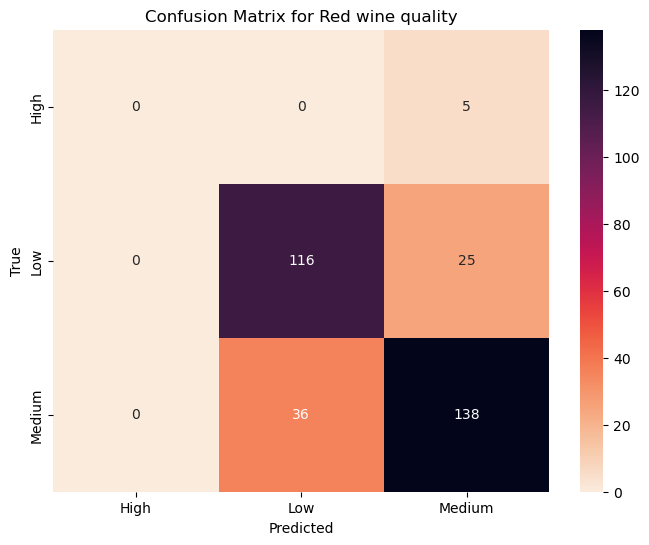

In [1049]:
# Make predictions for Quality of red wine
evaluate_model(red_rf, r_test, Q_test, target_names=["high", "low", "medium"])
cm = confusion_matrix(Q_test, red_rf.predict(r_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["High", "Low", 'Medium'], yticklabels=["High", "Low", "Medium"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Red wine quality")
plt.show()

<span style="font-size: larger;">Task 3. Implementing ML for defining WHITE WINE QUALITY</span>

In [1052]:
white_wine = pd.read_csv("D:\Data Science CAB\PJ\PJ2_Winery\winequality-white.csv", sep=';')
white_wine['quality_category'] = white_wine['quality'].apply(lambda value: '1' if value <= 5 else '2' if value <= 7 else '3')
white_wine['quality_category'].value_counts()

quality_category
2    3078
1    1640
3     180
Name: count, dtype: int64

Skewness&Kurtosis

In [ ]:
skewness_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).skew()
display('White wine', skewness_ww.sort_values())

'White wine'

total sulfur dioxide    0.390710
pH                      0.457783
alcohol                 0.487342
fixed acidity           0.647751
sulphates               0.977194
density                 0.977773
residual sugar          1.077094
citric acid             1.281920
free sulfur dioxide     1.406745
volatile acidity        1.576980
chlorides               5.023331
dtype: float64

In [ ]:
kurtosis_ww = white_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].astype(float).kurt() 
display(kurtosis_ww.sort_values())

alcohol                 -0.698425
pH                       0.530775
total sulfur dioxide     0.571853
sulphates                1.590930
fixed acidity            2.172178
residual sugar           3.469820
volatile acidity         5.091626
citric acid              6.174901
density                  9.793807
free sulfur dioxide     11.466342
chlorides               37.564600
dtype: float64

In [1053]:
Quality_white = white_wine["quality_category"].values.reshape(-1, 1)
white_wine = white_wine[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']]

print(white_wine.shape)
print(Quality.shape)

(4898, 5)
(4898, 1)


In [1054]:
white_wine.columns

Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')

In [1055]:
w_train, w_test, Quality_train, Quality_test = train_test_split(white_wine, Quality_white, test_size=0.2, random_state=99)

In [1056]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multi_ww_test, Quality_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multi_ww_test, Quality_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multi_ww_test, Quality_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multi_ww_test, Quality_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multi_ww_test, Quality_test))*100)

In [1057]:
models(w_train, Quality_train)

c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 70.40816326530613
Linear Regression Training Accuracy: 19.84019395403408
K Nearest Neighbor Training Accuracy: 0.6551020408163265
Decision Tree Classifier Training Accuracy: 72.44897959183673
Random Forest Classifier Training Accuracy: 78.16326530612245


In [1058]:
white_forest = RandomForestClassifier(n_estimators = 42, criterion = 'entropy', random_state = 0)
white_forest.fit(w_train, Quality_train.ravel())
print('Random Forest Classifier Training Accuracy:', (white_forest.score(w_test, Quality_test))*100)

Random Forest Classifier Training Accuracy: 79.6938775510204


<details>
<summary>Before GridSearchCV</summary>
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Training Accuracy: 0.6740643000495219
</details>

In [ ]:
#GridSearchCV no need to run again. Decode if necessary
param_grid = {
    'n_estimators': [200], # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    'max_depth': [None], #, 10, 20, 30],  
    'min_samples_split': [2], 
    'min_samples_leaf': [1],  
    'criterion': ['entropy'],
    'max_features': [None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
}
#grid_search = GridSearchCV(estimator=white_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
#grid_search.fit(w_train, Quality_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Best Training Accuracy:", best_score)

Best Parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200}
Best Training Accuracy: 0.7822845804988662


In [ ]:
#manual predictions
quality_mapping = {'1':"Low Quality", '2': "Medium Quality", '3': "High Quality"}
# Enter the attributes ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']
predictions_ww = [0.27, 0.045, 170.0, 1.00100, 8.8]
pred_result = white_forest.predict([predictions_ww]) 
predicted_quality_ww = quality_mapping.get(pred_result[0], "Unknown Quality")

print(f"We probably have White wine with : {predicted_quality_ww}"
      f"\n Our characteristics are: volatile acidity: {predictions_ww[0]}, chlorides: {predictions_ww[1]}, total sulfur dioxide: {predictions_ww[2]}  "
      f"\ndensity: {predictions_ww[3]}, alcohol: {predictions_ww[4]}"
      f"\nRandom Forest Classifier Training Accuracy:{white_forest.score(w_test, Quality_test) * 100:.2f}%")

We probably have White wine with : Medium Quality
 Our characteristics are: volatile acidity: 0.27, chlorides: 0.045, total sulfur dioxide: 170.0  
density: 1.001, alcohol: 8.8
Random Forest Classifier Training Accuracy:79.69%


c:\Users\Iurii Novachynskyi\anaconda3\envs\CAB\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix:
[[226 113   0]
 [ 69 542   1]
 [  1  15  13]]
Classification Report:
              precision    recall  f1-score   support

         low       0.76      0.67      0.71       339
      medium       0.81      0.89      0.85       612
        high       0.93      0.45      0.60        29

    accuracy                           0.80       980
   macro avg       0.83      0.67      0.72       980
weighted avg       0.80      0.80      0.79       980

Cohen-Kappa score: 0.5662463023509263


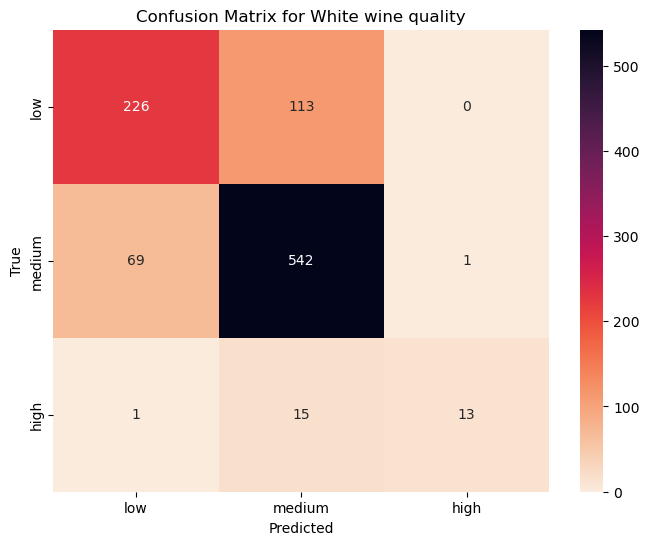

In [ ]:
#Make predictions for Quality of white wine
evaluate_model(white_forest, w_test, Quality_test, ["low", "medium", "high"])
cm = confusion_matrix(Quality_test, white_forest.predict(w_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket_r", xticklabels=["low", "medium", "high"], yticklabels=["low", "medium", "high"])
plt.xlabel("Predicted"), plt.ylabel("True")
plt.title("Confusion Matrix for White wine quality")
plt.show()

Prices_dataset